In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

basepath = '/home/amadurow/'
os.environ['picaso_refdata'] = basepath+'picaso/reference/'
os.environ['PYSYN_CDBS'] = basepath+'picaso/PYSYN_CDBS/'
refrind_dir = basepath+'picaso/_refrind/'
sonora_profile_db = basepath+'picaso/_sonora_profile_db/'

#picaso
import xarray
import picaso.opacity_factory as opa_fa
from picaso import justdoit as jdi 
from picaso import justplotit as jpi
import virga.justdoit as vjdi
import virga.justplotit as vjpi
from picaso.atmsetup import ATMSETUP

wave_range = [0.6,6]

In [2]:
fs = sorted(glob.glob('/data/models/*teff_900.0_grav_31.0_mh_0.5_co_1.0*'))
f = fs[0]
print(f)

/data/models/spectra_logzz_2.0_teff_900.0_grav_31.0_mh_0.5_co_1.0.nc


In [3]:
db_filename = '/data/opacity/new/all_opacities_0.6_6_R60000.db'
opa = jdi.opannection(filename_db=db_filename,wave_range=wave_range)
ds = jdi.xr.load_dataset(f)
bd = jdi.input_xarray(ds, opa, calculation='browndwarf')

/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:2244: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  self.raman_db = pd.read_csv(raman_data,


In [6]:
atmdf = bd.inputs['atmosphere']['profile']
all_mols = list(atmdf.columns)[11:]
mols = ['None']+all_mols
#mols = ['None', 'H2O', 'CH4', 'CO', 'CO2', 'H2S']
print(mols)

['None', 'H2O', 'CH4', 'CO', 'NH3', 'N2', 'PH3', 'H2S', 'TiO', 'VO', 'Fe', 'FeH', 'CrH', 'Na', 'K', 'Rb', 'Cs', 'CO2', 'HCN', 'C2H2', 'C2H4', 'C2H6', 'SiO', 'MgH', 'OCS', 'Li', 'LiOH', 'LiH', 'LiCl', 'LiF']


In [22]:
def leave_out_one_molecule(dis_df, mol):
    mol_keys = dis_df.keys()[3:]
    new_df = dis_df.copy(deep=True)
    if mol != 'None':
        new_df[mol] = np.zeros(91)
    sums =[]
    for i in range(91):
        sumvmr = np.sum(np.array(new_df.iloc[i])[3:])
        sums.append(sumvmr)
    sums = np.array(sums)
    for k in dis_df.keys()[3:]:
        column = new_df[k]
        norm_col = column/sums
        new_df[k] = norm_col
    return new_df

def single_molecule_vmr(dis_df, mol):
    mol_keys = dis_df.keys()[3:]
    new_df = dis_df.copy(deep=True)
    for k in mol_keys:
        if k == mol:
            #new_df[k] = np.ones(91)
            pass
        else:
            new_df[k] = np.zeros(91)
    return new_df

In [23]:
from copy import deepcopy


In [24]:
leave_one_outs = {}
only_one_outs = {}
for mol in mols:
    print(mol)
    copy_atmdf = deepcopy(atmdf)
    no_mol = leave_out_one_molecule(copy_atmdf,mol)
    one_mol = single_molecule_vmr(copy_atmdf,mol)
    
    bd.inputs['atmosphere']['profile'] = no_mol
    d = bd.spectrum(opa, calculation='browndwarf', full_output=True)
    newd = {}
    for key in ['wavenumber','thermal','thermal_unit']:
        newd[key] = d[key]
    leave_one_outs[mol] = newd

    bd.inputs['atmosphere']['profile'] = one_mol
    d = bd.spectrum(opa, calculation='browndwarf', full_output=True)
    newd = {}
    for key in ['wavenumber','thermal','thermal_unit']:
        newd[key] = d[key]
    only_one_outs[mol] = newd

None


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/atmsetup.py:414: RuntimeWarning: divide by zero encountered in scalar divide
  scale_h = self.c.k_b * tlevel[i] / (mmw[i] * gravity[i])
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/atmsetup.py:425: RuntimeWarning: divide by zero encountered in scalar divide
  scale_h = self.c.k_b * tlevel[i] / (mmw[i] * gravity[i])
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:152: RuntimeWarning: divide by zero encountered in divide
  COEF1 = atm.c.rgas*2

H2O


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),


CH4


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),


CO


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),


NH3


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),


N2


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),


PH3


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),


H2S


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),


TiO


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),


VO


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),


Fe


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:322: RuntimeWarning: invalid value encountered in divide
  ftau_cld = (single_scattering_cld * TAUCLD)/(single_scattering_cld * TAUCLD + TAURAY)
/home/amadurow/anaconda3/envs/picaso/lib/pyt

FeH


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),


CrH


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),


Na


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),


K


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),


Rb


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),


Cs


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),


CO2


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),


HCN


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),


C2H2


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),


C2H4


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:322: RuntimeWarning: invalid value encountered in divide
  ftau_cld = (single_scattering_cld * TAUCLD)/(single_scattering_cld * TAUCLD + TAURAY)
/home/amadurow/anaconda3/envs/picaso/lib/pyt

C2H6


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:322: RuntimeWarning: invalid value encountered in divide
  ftau_cld = (single_scattering_cld * TAUCLD)/(single_scattering_cld * TAUCLD + TAURAY)
/home/amadurow/anaconda3/envs/picaso/lib/pyt

SiO


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),


MgH


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),


OCS


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:322: RuntimeWarning: invalid value encountered in divide
  ftau_cld = (single_scattering_cld * TAUCLD)/(single_scattering_cld * TAUCLD + TAURAY)
/home/amadurow/anaconda3/envs/picaso/lib/pyt

Li


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),


LiOH


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:322: RuntimeWarning: invalid value encountered in divide
  ftau_cld = (single_scattering_cld * TAUCLD)/(single_scattering_cld * TAUCLD + TAURAY)
/home/amadurow/anaconda3/envs/picaso/lib/pyt

LiH


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:322: RuntimeWarning: invalid value encountered in divide
  ftau_cld = (single_scattering_cld * TAUCLD)/(single_scattering_cld * TAUCLD + TAURAY)
/home/amadurow/anaconda3/envs/picaso/lib/pyt

LiCl


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:322: RuntimeWarning: invalid value encountered in divide
  ftau_cld = (single_scattering_cld * TAUCLD)/(single_scattering_cld * TAUCLD + TAURAY)
/home/amadurow/anaconda3/envs/picaso/lib/pyt

LiF


/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:622: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dat = pd.read_csv(os.path.join(os.environ.get('picaso_refdata'), 'opacities','raman_fortran.txt'),
/home/amadurow/anaconda3/envs/picaso/lib/python3.9/site-packages/picaso-3.1.2-py3.9.egg/picaso/optics.py:322: RuntimeWarning: invalid value encountered in divide
  ftau_cld = (single_scattering_cld * TAUCLD)/(single_scattering_cld * TAUCLD + TAURAY)
/home/amadurow/anaconda3/envs/picaso/lib/pyt

In [25]:
np.save('leave_one_out_atms.npy',leave_one_outs)
np.save('only_one_molecule_atms.npy',only_one_outs)

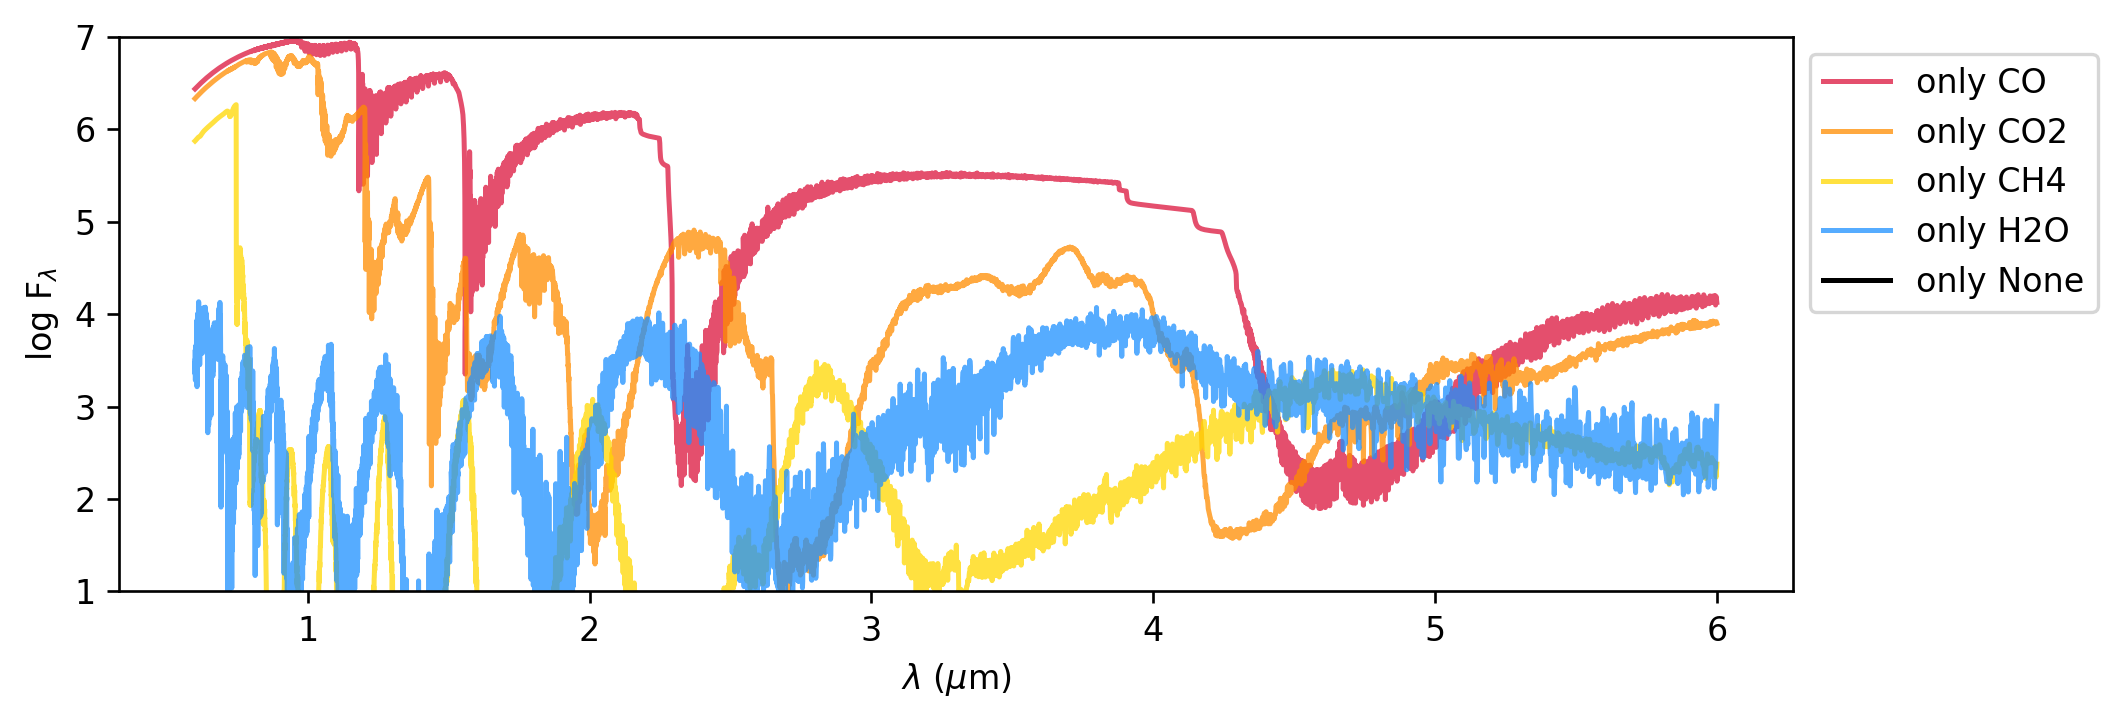

In [29]:
colors = ['crimson','darkorange','gold','dodgerblue','black']
alphas = [0.75,.75,.75,0.75,1] 
plot_mols = ['CO','CO2','CH4','H2O','None']

plt.figure(figsize=(9,3),dpi=240)

for i,mol in enumerate(plot_mols):
    d = only_one_outs[mol]
    L = 1/d['wavenumber']*1e4
    F = d['thermal']*1e-7

    X,Y = jdi.mean_regrid(opa.wno, F, R=2700)
    L = 1/X*1e4
    plt.plot(L,np.log10(Y),alpha=alphas[i],color=colors[i])
    
plt.legend(['only '+str(s) for s in plot_mols],bbox_to_anchor=[1,1,0,0],loc='upper left')
#plt.xlim([2.87,5.27])
plt.ylim([1,7])
plt.xlabel(r'$\lambda$ ($\mu$m)')
plt.ylabel(r'log F$_\lambda$')
plt.show()

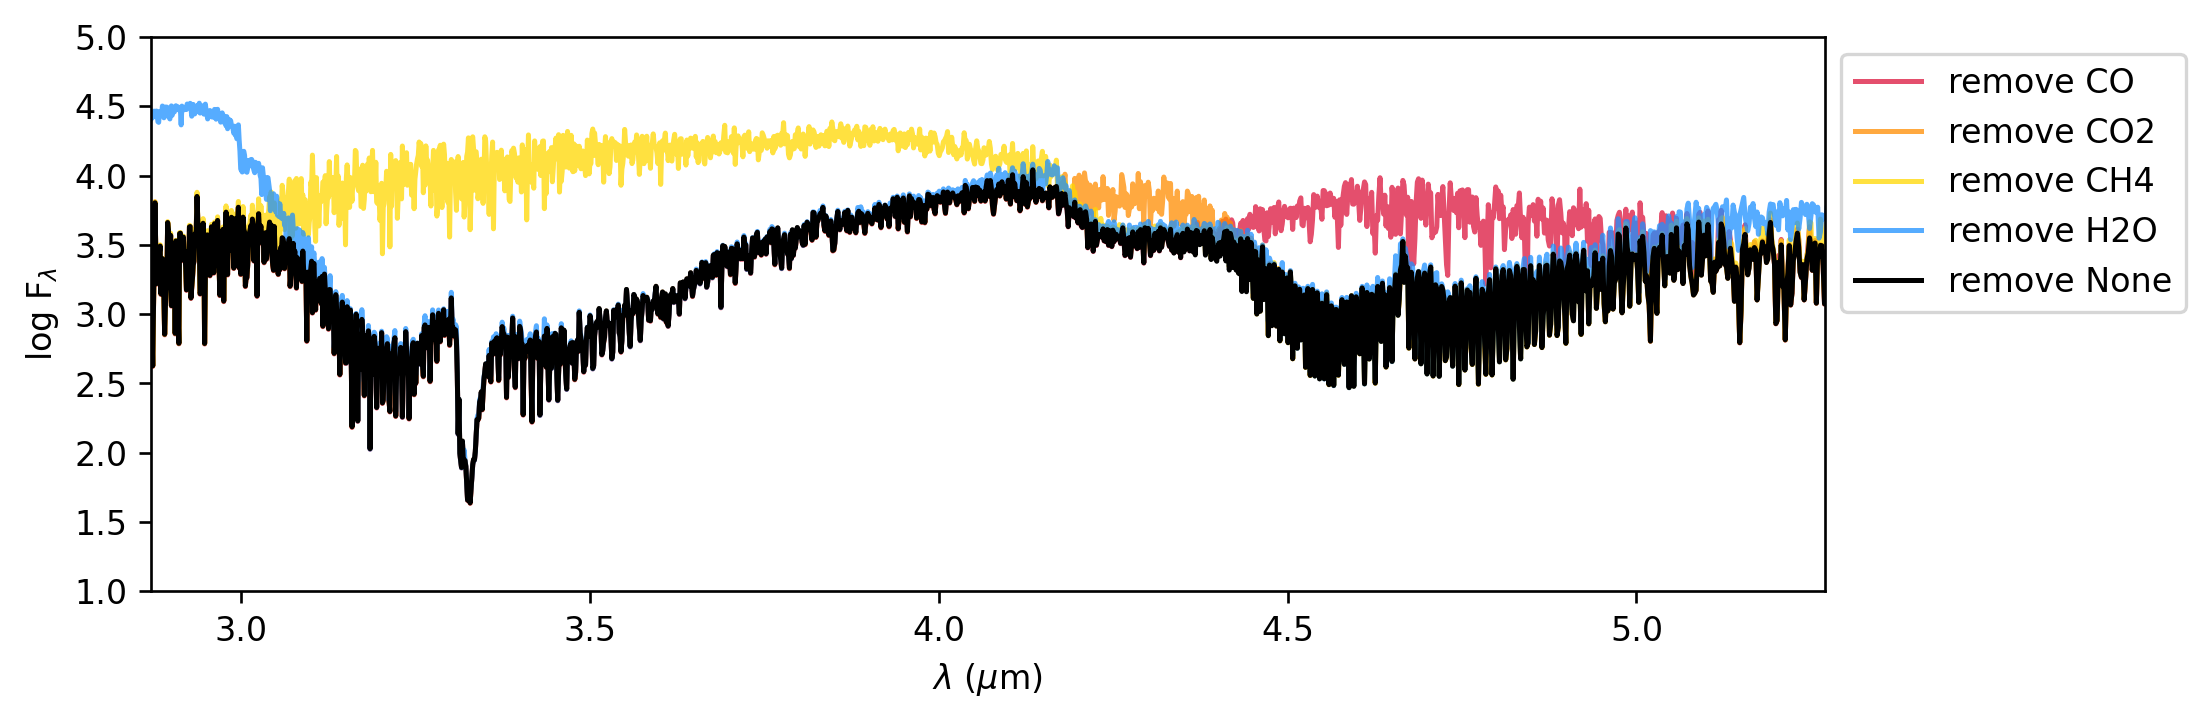

In [11]:
colors = ['crimson','darkorange','gold','dodgerblue','black']
alphas = [0.75,.75,.75,0.75,1] 
plot_mols = ['CO','CO2','CH4','H2O','None']

plt.figure(figsize=(9,3),dpi=240)

for i,mol in enumerate(plot_mols):
    d = outs[mol]
    L = 1/d['wavenumber']*1e4
    F = d['thermal']*1e-7

    X,Y = jdi.mean_regrid(opa.wno, F, R=2700)
    L = 1/X*1e4
    plt.plot(L,np.log10(Y),alpha=alphas[i],color=colors[i])
    
plt.legend(['remove '+str(s) for s in plot_mols],bbox_to_anchor=[1,1,0,0],loc='upper left')
plt.xlim([2.87,5.27])
plt.ylim([1,5])
plt.xlabel(r'$\lambda$ ($\mu$m)')
plt.ylabel(r'log F$_\lambda$')
plt.show()

In [12]:
cont = jdi.get_contribution(bd, opa, at_tau=1)

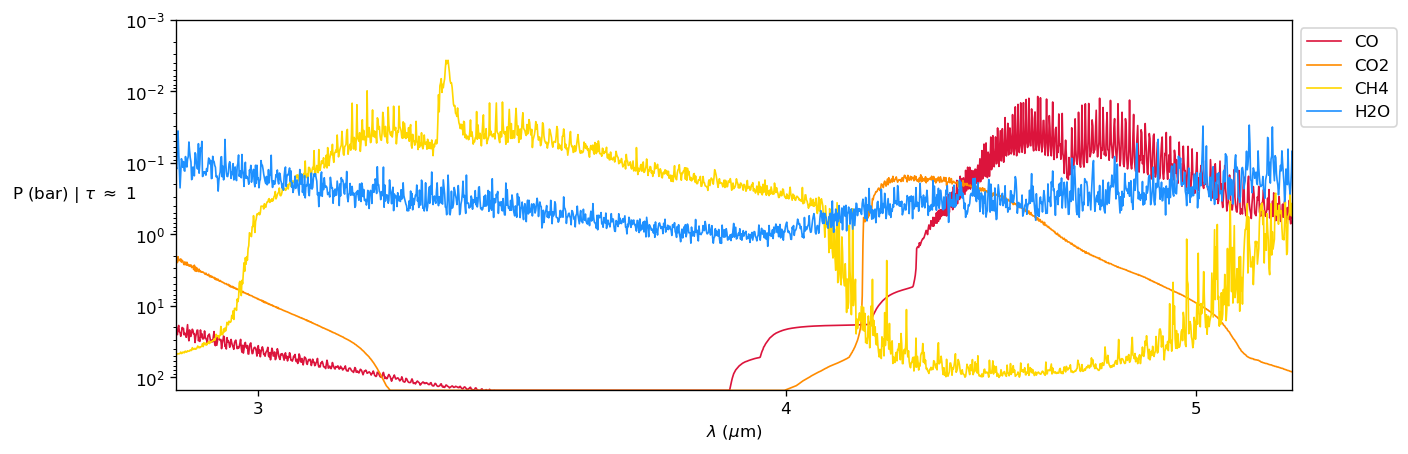

In [13]:
fig = plt.figure(figsize=(12,4),dpi=120)

molecules = ['CO','CO2','CH4','H2O']
colors = ['crimson','darkorange','gold','dodgerblue']

cont_d = cont['tau_p_surface']

lines = []
labels = []
for i,j in enumerate(molecules): 
    _X,_Y = jdi.mean_regrid(opa.wno, cont_d[j],R=2700)
    l, = plt.semilogy((1/_X)*1e4,_Y,label=j,linewidth=1,color=colors[i])
    lines.append(l)
    labels.append(j)
        
plt.legend(lines,labels,bbox_to_anchor=[1,1,0,0],loc='upper left')
plt.xscale('log')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,],['1','2','3','4','5','','','','','10','','','',''])
plt.ylim([1.5e2,1e-3])
#plt.xlim([2.7,5.2])
plt.xlim([2.87,5.27])
plt.xlabel(r'$\lambda$ ($\mu$m)')
plt.ylabel(r'P (bar) | $\tau$ $\approx$ 1 ',rotation=0,labelpad=30)

#plt.title(f)
plt.subplots_adjust(hspace=0)
#plt.savefig('plots/tau/'+tstring+'.png')
plt.show()

In [14]:
d = outs['None']
L = 1/d['wavenumber']*1e4
L[0],L[-1]

(5.999904441965684, 0.600001500001875)

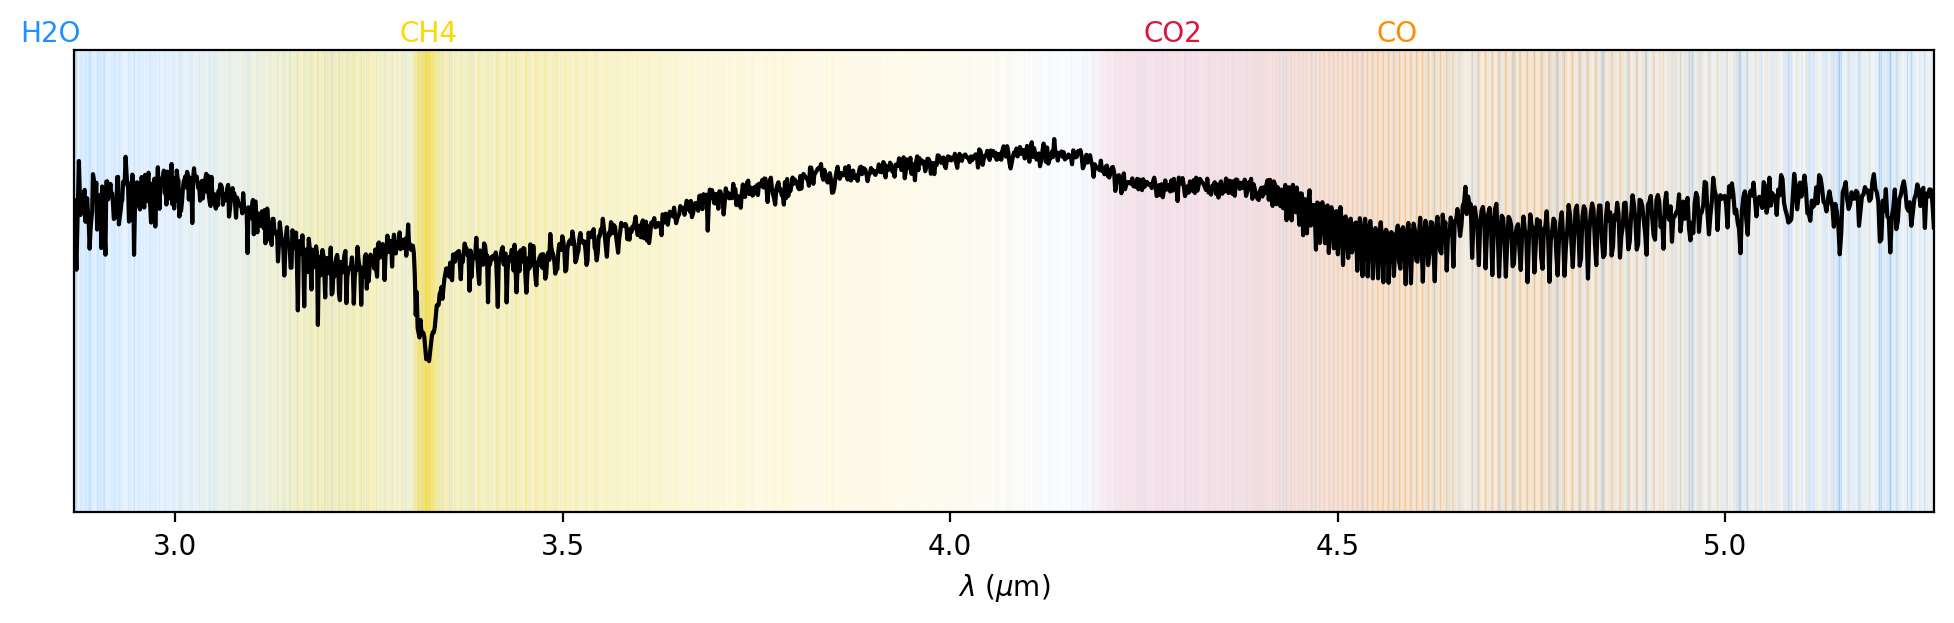

In [15]:
import matplotlib.colors as mcolors

def color2cmap(c):
    color_list = [c,'white']
    ncolors = 100
    cmap = mcolors.LinearSegmentedColormap.from_list('None', color_list, N=ncolors)

    my_cmap = cmap(np.arange(cmap.N))
    my_cmap[:,-1] = np.linspace(1, 0, cmap.N)
    my_cmap = mcolors.ListedColormap(my_cmap)
    
    return my_cmap

plt.figure(figsize=(12,3),dpi=200)
cont_mols = ['CH4','CO','H2O','CO2']
TX = [3.29, 4.55, 2.8, 4.25]
colors = ['gold','darkorange','dodgerblue','crimson']

for i,mol in enumerate(cont_mols[:]):
    #print(i,mol)
    color = colors[i]
    cmap = color2cmap(color)
    y = cont['tau_p_surface'][mol]
    
    X,Y = jdi.mean_regrid(opa.wno, y, R=27000)
    L = 1/X*1e4
    
    newL = np.linspace(0.6,6,100000)
    newy = np.interp(newL,np.flip(L),np.flip(Y))
    #print(newL)
    #print(newy)
    plt.imshow(np.log10(newy.reshape(1,-1)), extent=[newL[0],newL[-1],0,5],aspect='auto',vmin=-2.8,vmax=0.2,cmap=cmap)
    plt.text(TX[i],5.1,mol,color=color)

d = outs['None']
X,Y = jdi.mean_regrid(d['wavenumber'], d['thermal'], R=2700)
L = 1/X*1e4
F = Y*1e-7
plt.plot(L,np.log10(F),color='k')
plt.ylim([0,5])

plt.xlim([2.87,5.27])
plt.yticks([])
plt.xlabel(r'$\lambda$ ($\mu$m)')
plt.show()

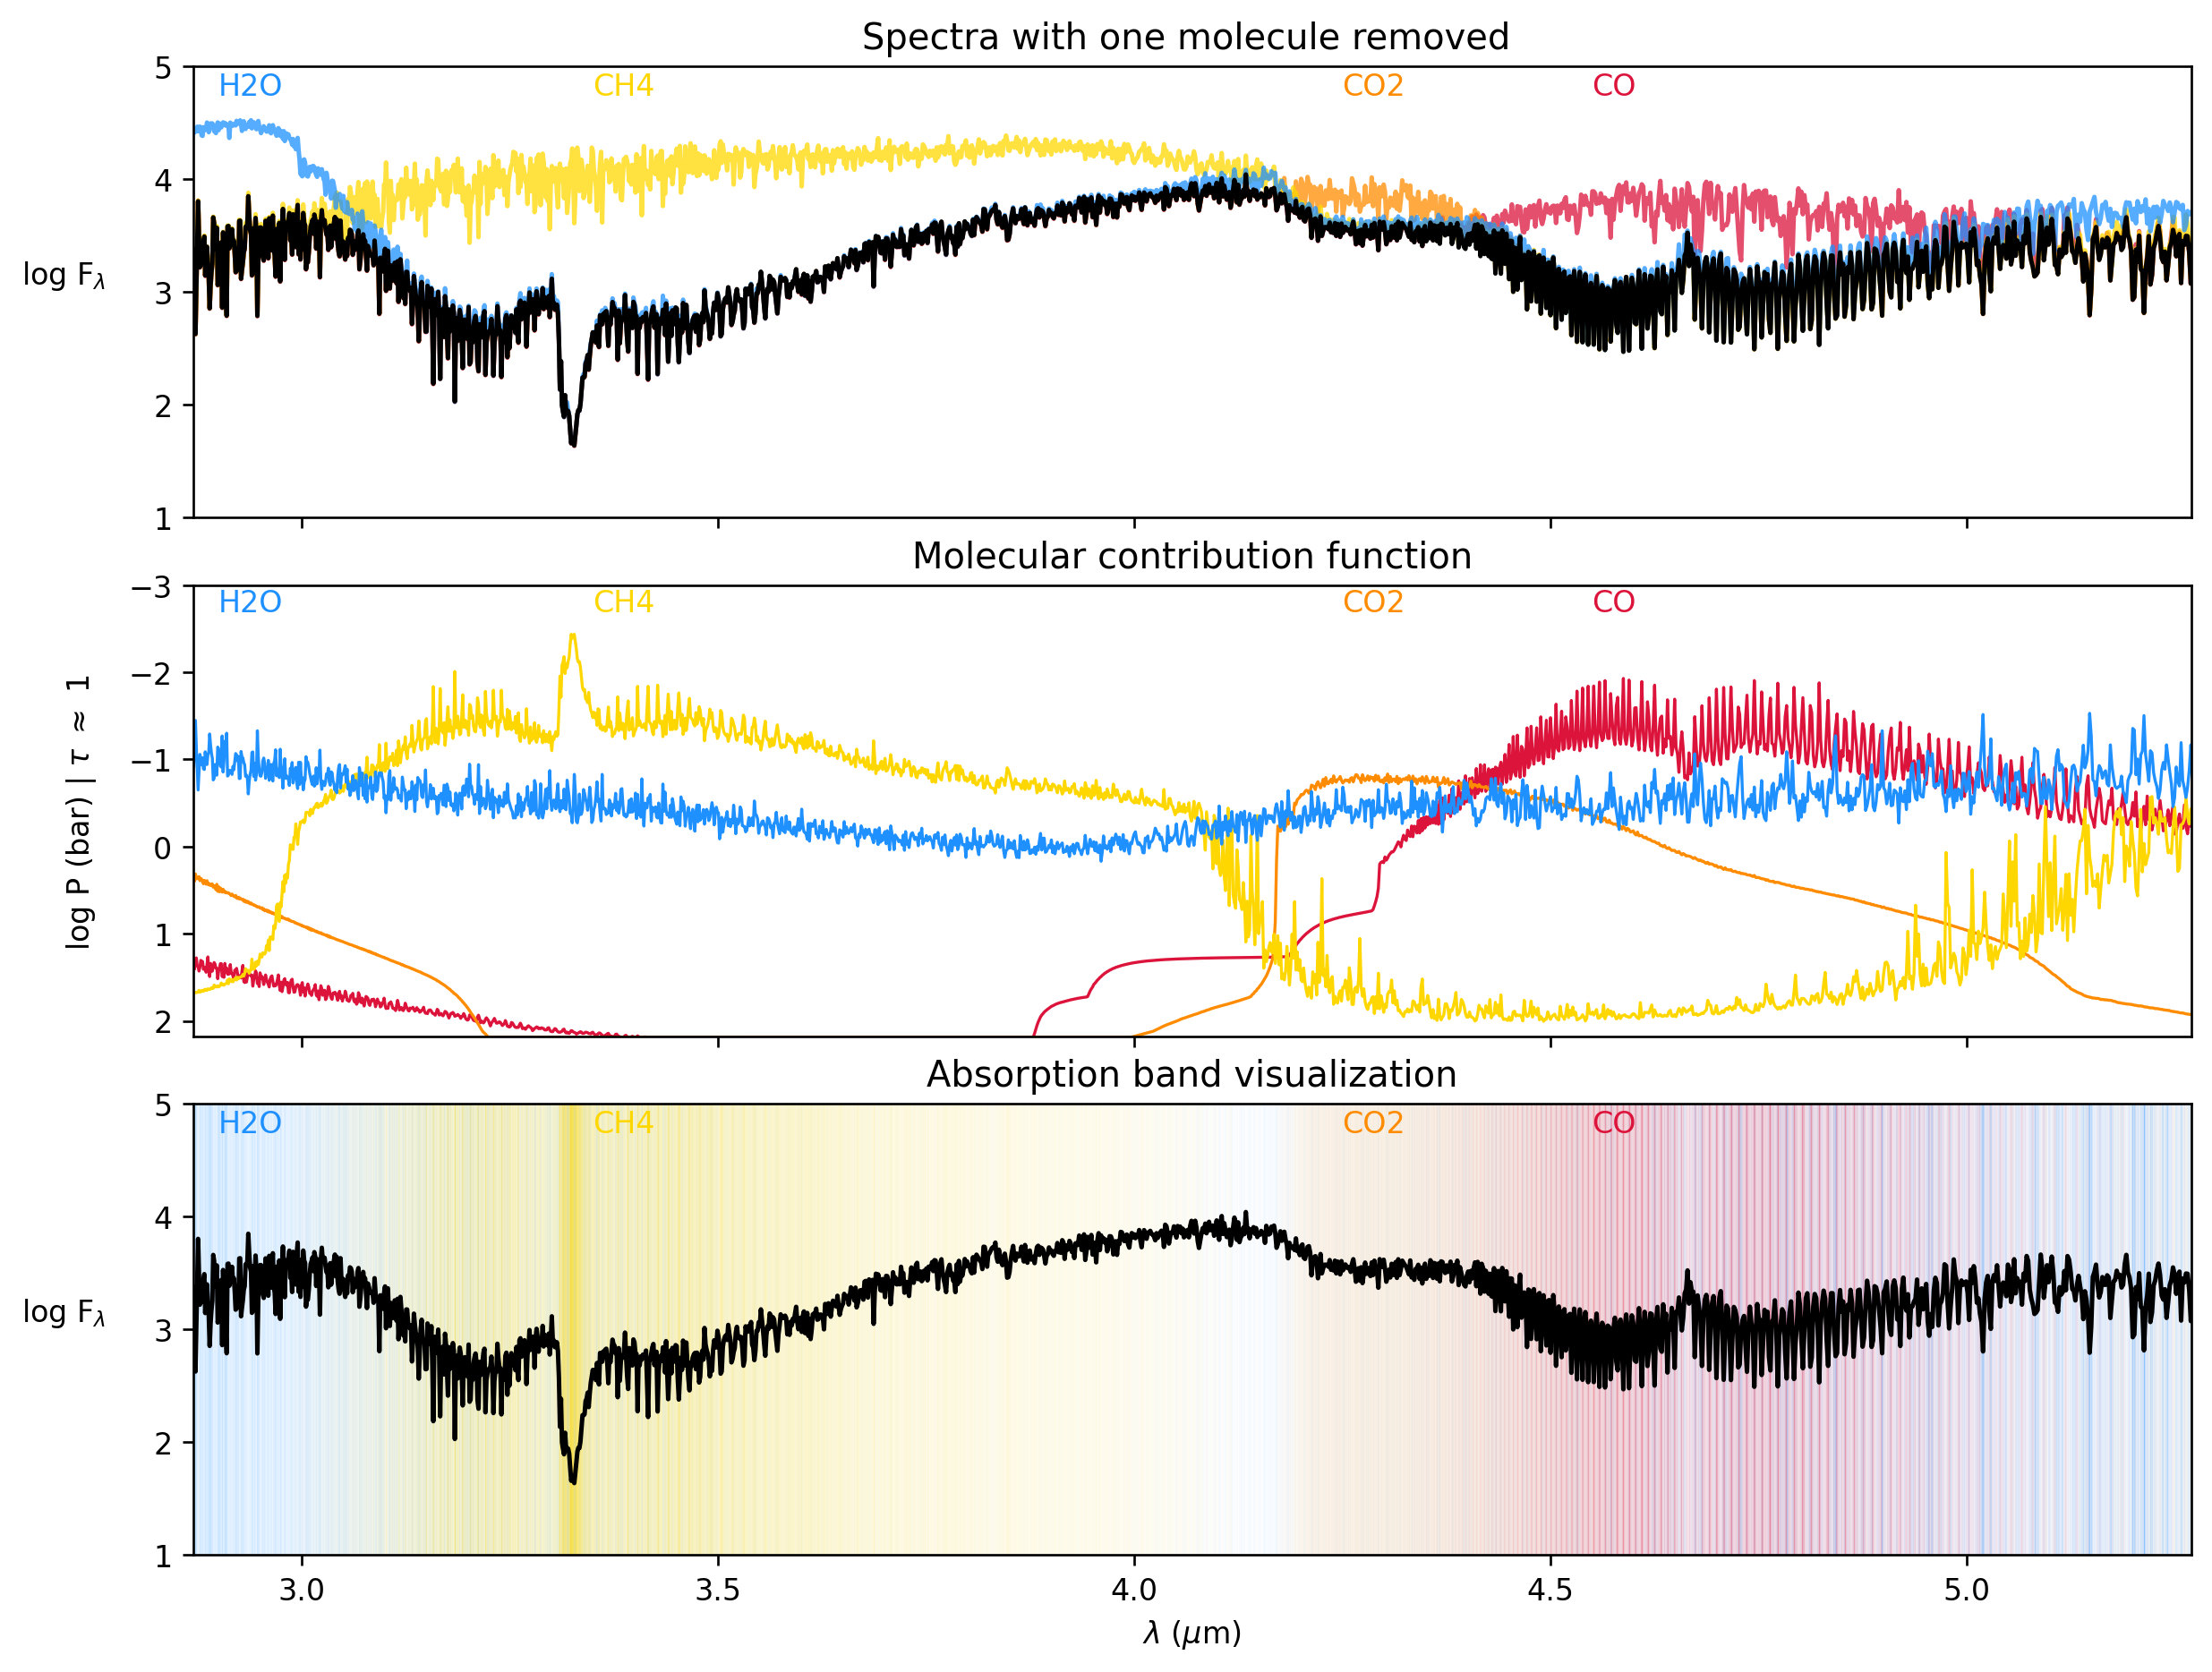

In [21]:
fig,ax = plt.subplots(3,1, figsize=(12,9),dpi=240,sharex=True)

colors = ['crimson','darkorange','gold','dodgerblue','black']
alphas = [0.75,.75,.75,0.75,1] 
plot_mols = ['CO','CO2','CH4','H2O','None']

for i,mol in enumerate(plot_mols):
    d = outs[mol]
    L = 1/d['wavenumber']*1e4
    F = d['thermal']*1e-7

    X,Y = jdi.mean_regrid(opa.wno, F, R=2700)
    L = 1/X*1e4
    ax[0].plot(L,np.log10(Y),alpha=alphas[i],color=colors[i])
    
#ax[0].legend(['remove '+str(s) for s in plot_mols],bbox_to_anchor=[1,1,0,0],loc='upper left')
ax[0].set_xlim([2.87,5.27])
ax[0].set_ylim([1,5])
#ax[0].set_xlabel(r'$\lambda$ ($\mu$m)')
ax[0].set_ylabel(r'log F$_\lambda$',rotation=0,labelpad=30)


molecules = ['CO','CO2','CH4','H2O']
colors = ['crimson','darkorange','gold','dodgerblue']

cont_d = cont['tau_p_surface']

lines = []
labels = []
for i,j in enumerate(molecules): 
    _X,_Y = jdi.mean_regrid(opa.wno, cont_d[j],R=2700)
    l, = ax[1].plot((1/_X)*1e4,np.log10(_Y),label=j,linewidth=1,color=colors[i])
    lines.append(l)
    labels.append(j)
        
#ax[1].legend(lines,labels,bbox_to_anchor=[1,1,0,0],loc='upper left')
#ax[1].set_xscale('log')
#ax[1].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,],['1','2','3','4','5','','','','','10','','','',''])
ax[1].set_ylim([np.log10(1.5e2),-3])
ax[1].set_xlim([2.87,5.27])
#ax[1].set_xlabel(r'$\lambda$ ($\mu$m)')
ax[1].set_ylabel(r'log P (bar) | $\tau$ $\approx$ 1 ',rotation=90,labelpad=10)


cont_mols = ['CH4','CO','H2O','CO2']
TX = [3.35, 4.55, 2.9, 4.25]
colors = ['gold','crimson','dodgerblue','darkorange']

for i,mol in enumerate(cont_mols[:]):
    #print(i,mol)
    color = colors[i]
    cmap = color2cmap(color)
    y = cont['tau_p_surface'][mol]
    
    X,Y = jdi.mean_regrid(opa.wno, y, R=27000)
    L = 1/X*1e4
    
    newL = np.linspace(0.6,6,100000)
    newy = np.interp(newL,np.flip(L),np.flip(Y))
    #print(newL)
    #print(newy)
    ax[2].imshow(np.log10(newy.reshape(1,-1)), extent=[newL[0],newL[-1],0,5],aspect='auto',vmin=-2.8,vmax=0.2,cmap=cmap)
    for _ in range(3):
        if _ == 1:
            y = -2.7
        else:
            y = 4.75
        ax[_].text(TX[i],y,mol,color=color)

d = outs['None']
X,Y = jdi.mean_regrid(d['wavenumber'], d['thermal'], R=2700)
L = 1/X*1e4
F = Y*1e-7
ax[2].plot(L,np.log10(F),color='k')
ax[2].set_ylim([0,5])

ax[2].set_xlim([2.87,5.27])
ax[2].set_ylim([1,5])
ax[2].set_xlabel(r'$\lambda$ ($\mu$m)')
ax[2].set_ylabel(r'log F$_\lambda$',rotation=0,labelpad=30)

ax[0].set_title('Spectra with one molecule removed ')
ax[1].set_title('Molecular contribution function')
ax[2].set_title('Absorption band visualization')

plt.subplots_adjust(hspace=0.15)
plt.show()

In [192]:
h2o = cont['tau_p_surface']['H2O']
ch4 = cont['tau_p_surface']['CH4']
co2 = cont['tau_p_surface']['CO2']
co = cont['tau_p_surface']['CO']

In [36]:
mininds = []

mols = ['H2O','CH4','CO2','CO']
conts = []
for m in mols:
    mc = cont['tau_p_surface'][m]
    x,y = jdi.mean_regrid(opa.wno, mc, R=300)
    L = 1/x*1e4
    wbool = np.logical_and((L<5.27),(L>2.87))
    x = x[wbool]
    conts.append(y[wbool])

N = len(x)
for i in range(N):
    ilist = []
    for c in conts:
        ilist.append(c[i])
    ind = np.argmin(ilist)
    mininds.append(ind)
    
mininds = np.array(mininds)

In [37]:
for i in range(4):
    print(mols[i],np.round(np.sum(mininds == i)/N,3))

H2O 0.225
CH4 0.478
CO2 0.088
CO 0.209


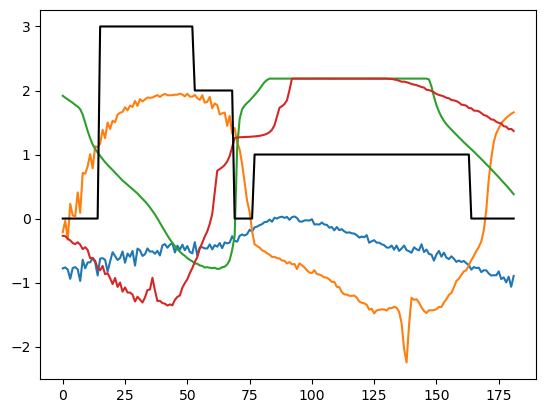

In [38]:
for c in conts:
    plt.plot(np.log10(c))
plt.plot(mininds,'k')

In [39]:
mininds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [41]:
8/N

0.04395604395604396